In [1]:
# If running on mac with Apple silicon, make sure you have installed a version of Python that is native for mac silicon.
# Remember to change kernels. Switch to Python3 (ipykernel) UCSD to avoid hardware error.

# Check Python version:
from platform import python_version

print(python_version())

3.11.7


In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import scipy
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
image_size = [512,512]
#data_path = '/content/drive/My Drive/Harvard Medical Dataset2'
# Updated data_path to reflect the locaiton of the images on my computer.
data_path = '/Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/Harvard Medical Dataset2' 


In [3]:
conv = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [4]:
conv.output

<KerasTensor: shape=(None, 16, 16, 512) dtype=float32 (created by layer 'block5_pool')>

In [5]:
for layer in conv.layers:
    layer.trainable = False

In [6]:
x = conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
x=  Dropout(.2)(x)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = conv.input,outputs=pred)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [8]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

#train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Harvard Medical Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='training', batch_size=10, class_mode='categorical')
#val_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Harvard Medical Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

# Updated image path for training and validation to be my path.
train_generator=train_datagen.flow_from_directory(data_path, target_size=(256,256), color_mode='rgb', shuffle=False, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory(data_path, target_size=(256,256), color_mode='rgb', shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 122 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)
     

122
10
7


In [10]:
print(val_generator.n)
print(val_generator.batch_size)

30
10


In [11]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=40,  verbose=1, validation_data=val_generator)

Epoch 1/40
12/12 [==============================] - 12s 1s/step - loss: 1.0081 - accuracy: 0.5667 - val_loss: 1.1878 - val_accuracy: 0.5333
Epoch 2/40
12/12 [==============================] - 10s 846ms/step - loss: 0.9226 - accuracy: 0.4643 - val_loss: 0.7067 - val_accuracy: 0.4667
Epoch 3/40
12/12 [==============================] - 9s 740ms/step - loss: 0.7163 - accuracy: 0.3750 - val_loss: 0.6809 - val_accuracy: 0.5333
Epoch 4/40
12/12 [==============================] - 11s 957ms/step - loss: 0.6982 - accuracy: 0.5089 - val_loss: 0.6704 - val_accuracy: 0.6667
Epoch 5/40
12/12 [==============================] - 17s 1s/step - loss: 0.7447 - accuracy: 0.3571 - val_loss: 0.6802 - val_accuracy: 0.5333
Epoch 6/40
12/12 [==============================] - 9s 716ms/step - loss: 0.6876 - accuracy: 0.5446 - val_loss: 0.6491 - val_accuracy: 0.5667
Epoch 7/40
12/12 [==============================] - 9s 784ms/step - loss: 0.7226 - accuracy: 0.5089 - val_loss: 0.6664 - val_accuracy: 0.8000
Epoch 8/

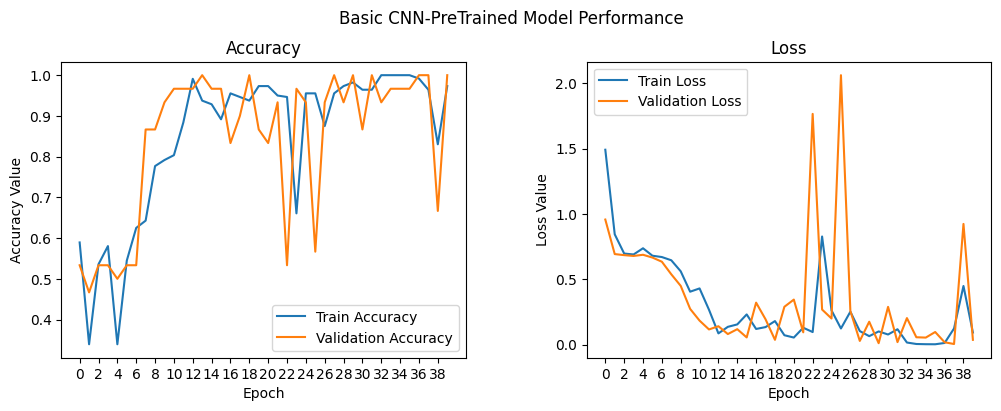

In [13]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN-PreTrained Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,40))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 40, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 40, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [16]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_generator, val_generator.n // val_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [17]:
print(val_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[16  0]
 [ 0 14]]


In [19]:
print('Classification Report')
target_names = ['Abnormal', 'Normal']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00        16
      Normal       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(113.9222222222222, 0.5, 'True Values')

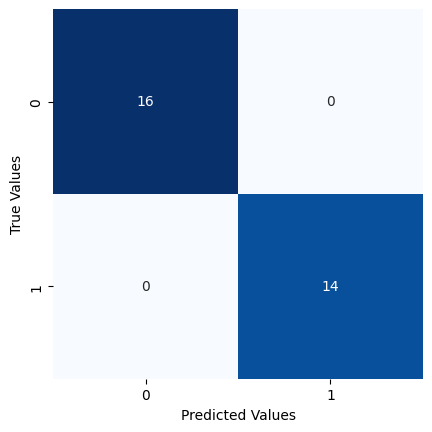

In [20]:
import seaborn as sns
cm=confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
     

[Text(0, 0.5, 'Abnormal'), Text(0, 1.5, 'Normal')]

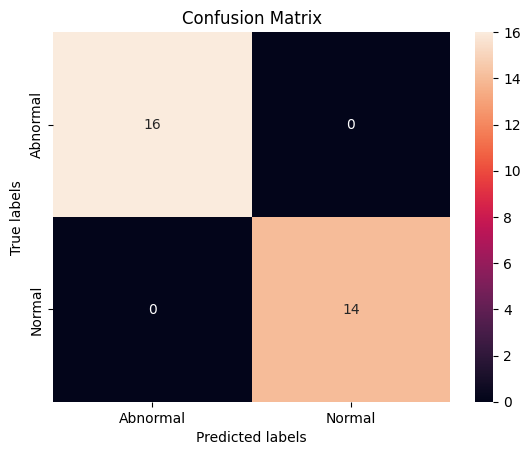

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal'])

Confusion Matrix :
[[16  0]
 [ 0 14]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

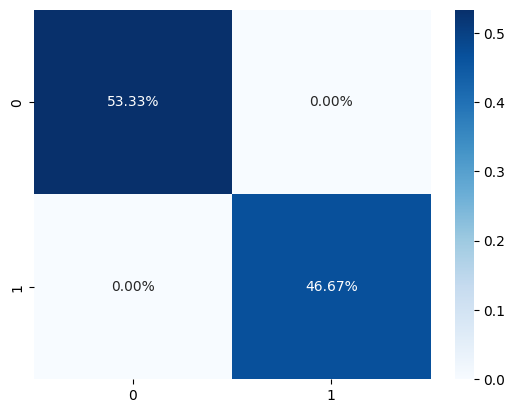

In [22]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(val_generator.classes,y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(val_generator.classes,y_pred)) 
print('Report : ')
print(classification_report(val_generator.classes,y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')
     

In [23]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_generator.classes, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

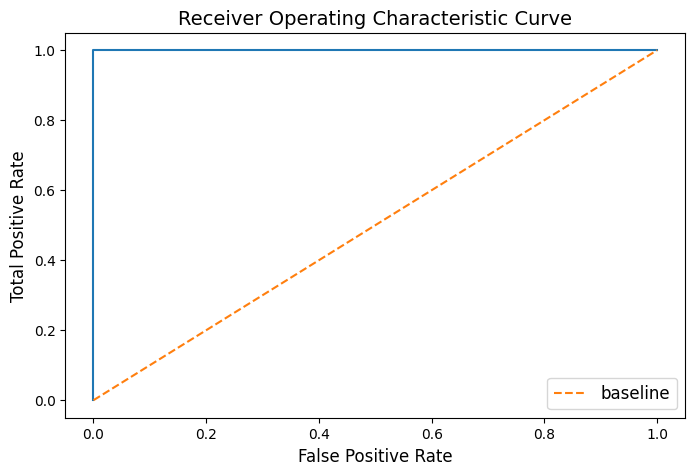

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [25]:
#model.save('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalmodel.h5')
# Updated to my path.
# data_path = '/Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/Harvard Medical Dataset2' 

model.save(data_path + '/my_VGG16finalmodel.h5')

In [26]:
# model.save_weights('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalweight')
# Updated to my path.
model.save_weights(data_path + '/my_VGG16finalweight')